In [1]:
from behavioral_albert import *
%matplotlib inline

# Behavioral Alignment

In [2]:
# fields = ['onset', 'first_lick_in', 
#           'last_lick_out', 'water_valve_on', 'outcome'] 
data_root = r'\\filenest.diskstation.me\Wilbrecht_file_server\Madeline\processed_data'
gse = GoNoGo_Expr(data_root)
animal, session = 'JUV011', '211215'
bmat, gn_series = gse.load_animal_session(animal, session)
bdf, dff_df = bmat.todf(), gn_series.calculate_dff()

Changing plot_path as \filenest.diskstation.me\Wilbrecht_file_server\Madeline\plots


INFO:root:Using jove zdff method for dff calculation by default
INFO:root:skipping 0th entry in event_times
INFO:root:skipping 1th entry in event_times
INFO:root:skipping 388th entry in event_times
INFO:root:skipping 0th entry in event_times
INFO:root:skipping 1th entry in event_times
INFO:root:skipping 388th entry in event_times
INFO:root:skipping 0th entry in event_times
INFO:root:skipping 1th entry in event_times
INFO:root:skipping 388th entry in event_times
INFO:root:skipping 0th entry in event_times
INFO:root:skipping 1th entry in event_times
INFO:root:skipping 388th entry in event_times
INFO:root:skipping 0th entry in event_times
INFO:root:skipping 1th entry in event_times
INFO:root:skipping 388th entry in event_times
INFO:root:skipping 0th entry in event_times
INFO:root:skipping 1th entry in event_times
INFO:root:skipping 388th entry in event_times
INFO:root:skipping 0th entry in event_times
INFO:root:skipping 1th entry in event_times
INFO:root:skipping 388th entry in event_time

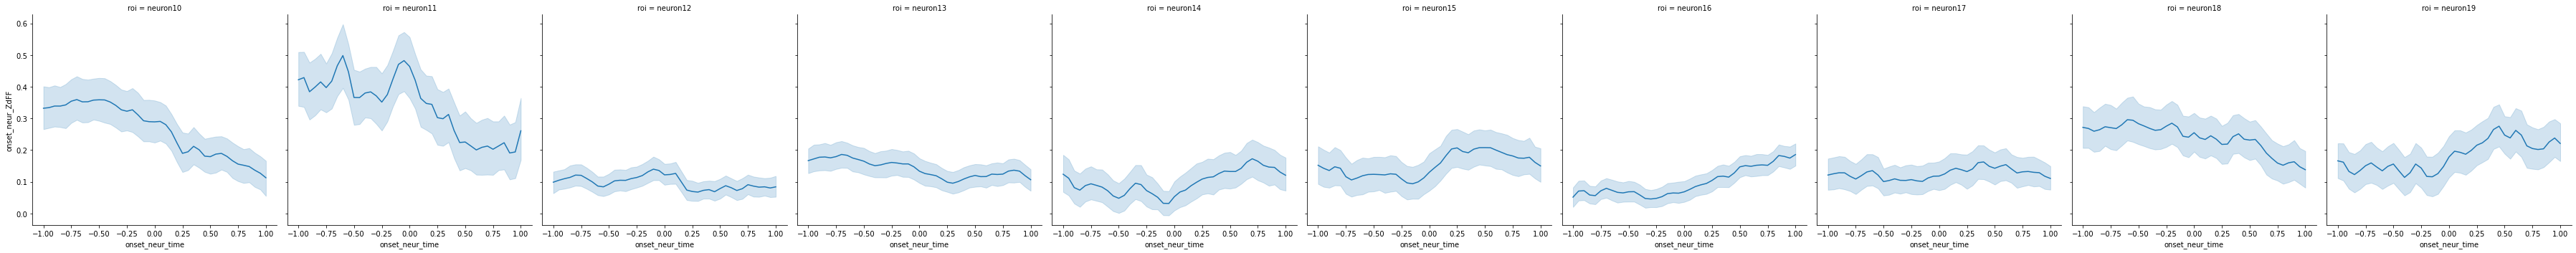

In [6]:
# cue 2: first go cue, cue 7: nogo
event = 'onset'
neurons = [f'neuron{i}' for i in range(10, 20)]
neur_dff_df = dff_df[dff_df['roi'].isin(neurons)].reset_index(drop=True)
nb_df = gse.nbm.align_B2N_dff_ID(bdf, neur_dff_df, [event], form='wide')
plot_df = gse.nbm.lag_wide_df(nb_df, {f'{event}_neur': {'long':True}})
sns.relplot(data=plot_df, x=f'{event}_neur_time', y=f'{event}_neur_ZdFF', col='roi', kind='line', palette='Spectral')

INFO:root:Using jove zdff method for dff calculation by default
INFO:root:skipping 0th entry in event_times
INFO:root:skipping 388th entry in event_times
INFO:root:skipping 0th entry in event_times
INFO:root:skipping 388th entry in event_times


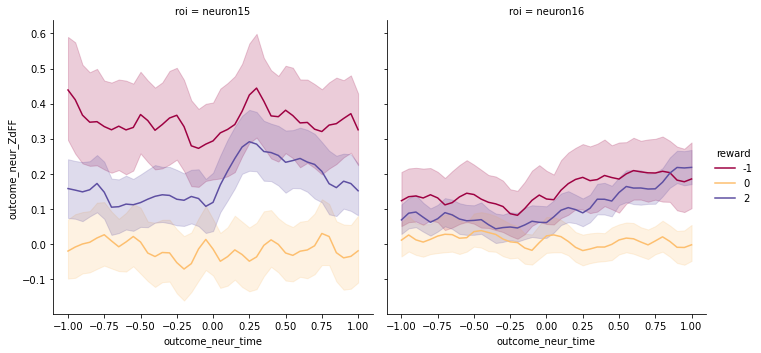

In [5]:
event = 'outcome'
neurons = [f'neuron{i}' for i in range(15, 17)]
neur_dff_df = dff_df[dff_df['roi'].isin(neurons)].reset_index(drop=True)
nb_df = gse.nbm.align_B2N_dff_ID(bdf, neur_dff_df, [event], form='wide')
plot_df = gse.nbm.lag_wide_df(nb_df, {f'{event}_neur': {'long':True}})
sns.relplot(data=plot_df, x=f'{event}_neur_time', y=f'{event}_neur_ZdFF', hue='reward', col='roi', kind='line', palette='Spectral')

INFO:root:Using jove zdff method for dff calculation by default
INFO:root:skipping 0th entry in event_times
INFO:root:skipping 1th entry in event_times
INFO:root:skipping 388th entry in event_times
INFO:root:skipping 0th entry in event_times
INFO:root:skipping 1th entry in event_times
INFO:root:skipping 388th entry in event_times


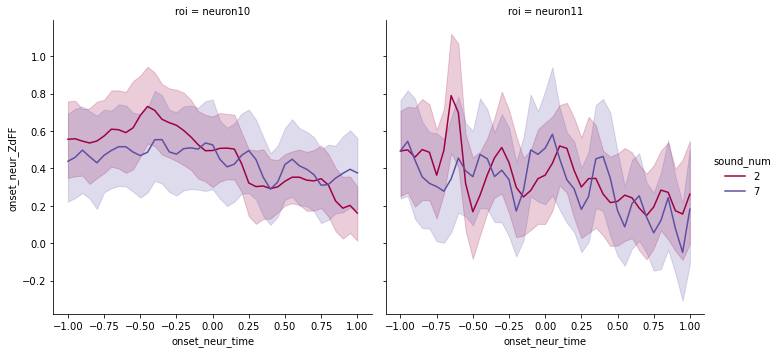

In [7]:
event = 'onset'
neurons = [f'neuron{i}' for i in range(10, 12)]
neur_dff_df = dff_df[dff_df['roi'].isin(neurons)].reset_index(drop=True)
nb_df = gse.nbm.align_B2N_dff_ID(bdf, neur_dff_df, [event], form='wide')
plot_df = gse.nbm.lag_wide_df(nb_df, {f'{event}_neur': {'long':True}})
plot_df = plot_df[plot_df['sound_num'].isin([2, 7])]
sns.relplot(data=plot_df, x=f'{event}_neur_time', y=f'{event}_neur_ZdFF', hue='sound_num', col='roi', kind='line', palette='Spectral')

INFO:root:Using jove zdff method for dff calculation by default
INFO:root:skipping 0th entry in event_times
INFO:root:skipping 1th entry in event_times
INFO:root:skipping 0th entry in event_times
INFO:root:skipping 1th entry in event_times


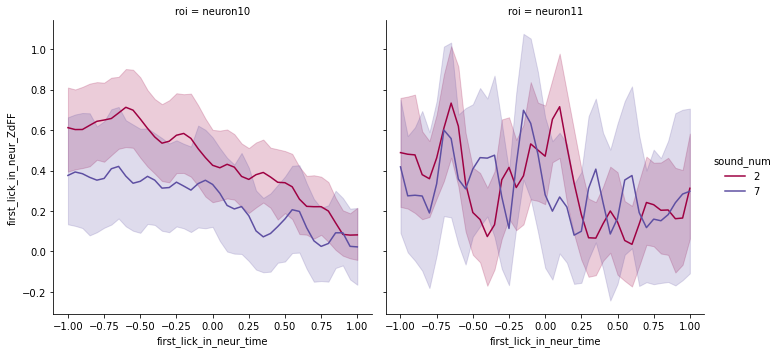

In [8]:
event = 'first_lick_in'
neurons = [f'neuron{i}' for i in range(10, 12)]
neur_dff_df = dff_df[dff_df['roi'].isin(neurons)].reset_index(drop=True)
nb_df = gse.nbm.align_B2N_dff_ID(bdf, neur_dff_df, [event], form='wide')
plot_df = gse.nbm.lag_wide_df(nb_df, {f'{event}_neur': {'long':True}})
plot_df = plot_df[plot_df['sound_num'].isin([2, 7])]
sns.relplot(data=plot_df, x=f'{event}_neur_time', y=f'{event}_neur_ZdFF', hue='sound_num', col='roi', kind='line', palette='Spectral')

# Visualization of CaImAm

In [18]:
# Get file from server
input_folder = fr"\\filenest.diskstation.me\Wilbrecht_file_server\Madeline\processed_data\{animal}\{session}"
input_file = fr"{animal}-{session}-gonogo-001.hdf5"
hf = h5py.File(os.path.join(input_folder, input_file), 'r')

In [19]:
from scipy.sparse import csc_matrix
import scipy
from scipy.stats import norm

def load_A(hf):
    if 'estimates' in hf:
        A = hf['estimates']['A']
    else:
        A = hf['Nsparse']
    data = A['data']
    indices = A['indices']
    indptr = A['indptr']
    return csc_matrix((data, indices, indptr), A['shape'])
A = load_A(hf)
dims = list(np.array(hf['dims']))

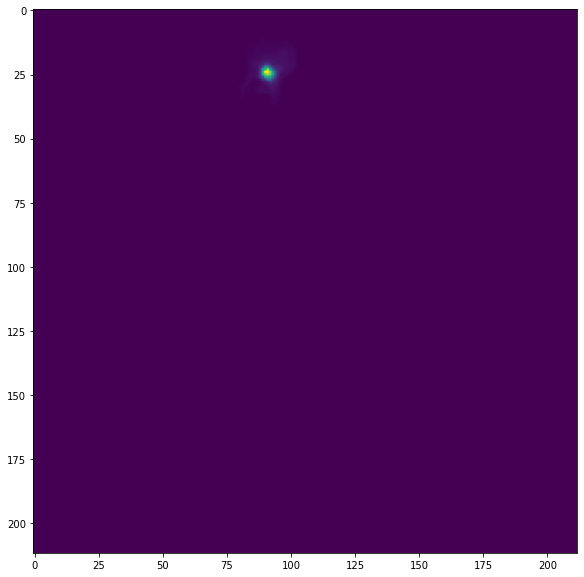

In [20]:
roi_index = 157
plt.figure(figsize=(10, 10))
plt.imshow(A.toarray()[:, roi_index].reshape(dims, order='F'))

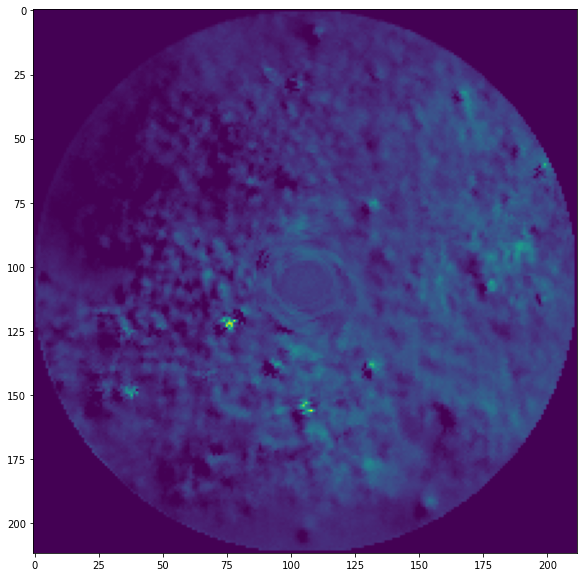

In [21]:
plt.figure(figsize=(10, 10))
plt.imshow(hf['estimates/b'][:, 1].reshape(dims, order='F'))

In [22]:
hf['estimates/b'].shape

(44944, 2)

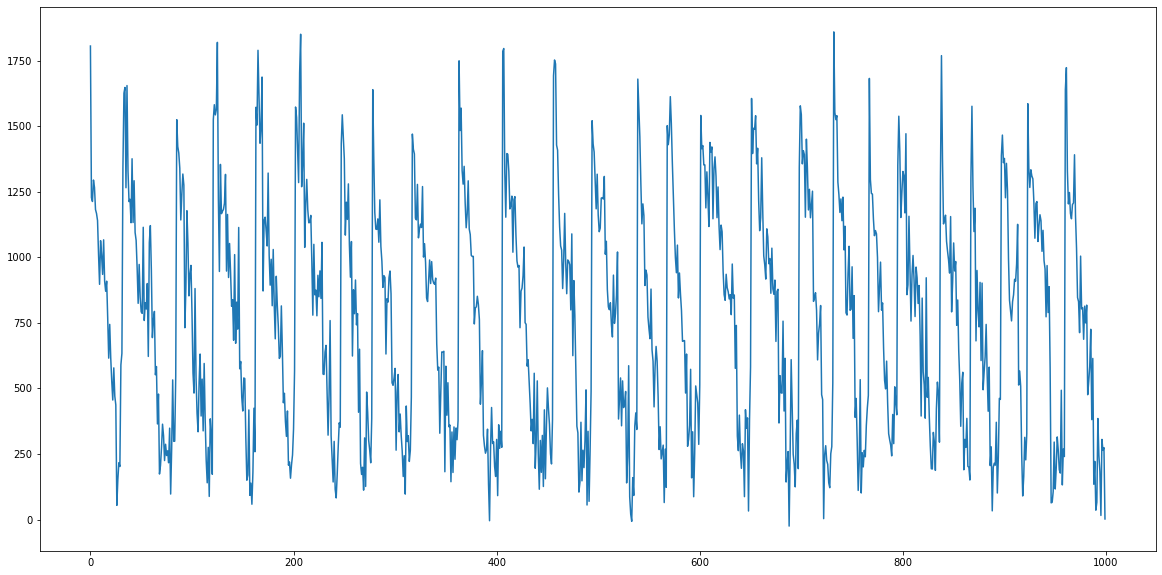

In [23]:
plt.figure(figsize=(20, 10))
plt.plot(hf['estimates/f'][1, :1000])